In [21]:
%run helper_functions.ipynb

Requirement already up-to-date: imbalanced-learn in /usr/local/Anaconda3-5.3.1-Linux-x86_64/envs/jupyter-atp/lib/python3.6/site-packages (0.4.3)


[nltk_data] Downloading package punkt to /u1/sjameled/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /u1/sjameled/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /u1/sjameled/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
txt=pd.read_csv('training_text',sep="\|\|",engine='python', header=None, skiprows=1, names=["ID","Text"])
variants=pd.read_csv('training_variants')
solution=pd.read_csv('stage1_solution_filtered.csv')


In [4]:
convert_classes(solution)

,ID,Class
0,12,1
1,19,2
2,21,2
3,55,4
4,64,4
5,70,4
6,89,9
7,93,7
8,111,7
9,113,7


In [5]:
df=pd.merge(txt,variants,on='ID',how='inner')

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

# Data Exploration

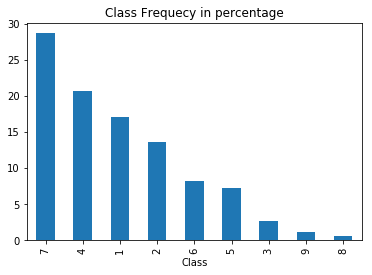

In [22]:
class_freq(df)

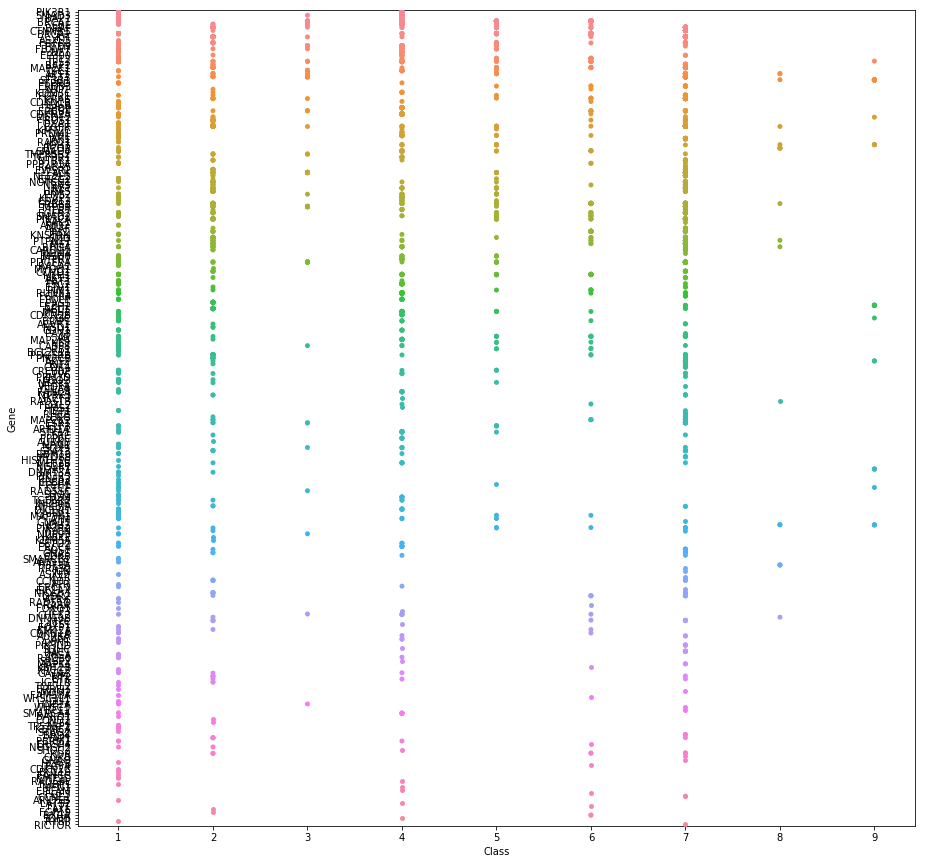

In [8]:
plt.figure(figsize=(15,15))
sns.stripplot(x='Class',y='Gene',data=df,jitter=True);
plt.show()

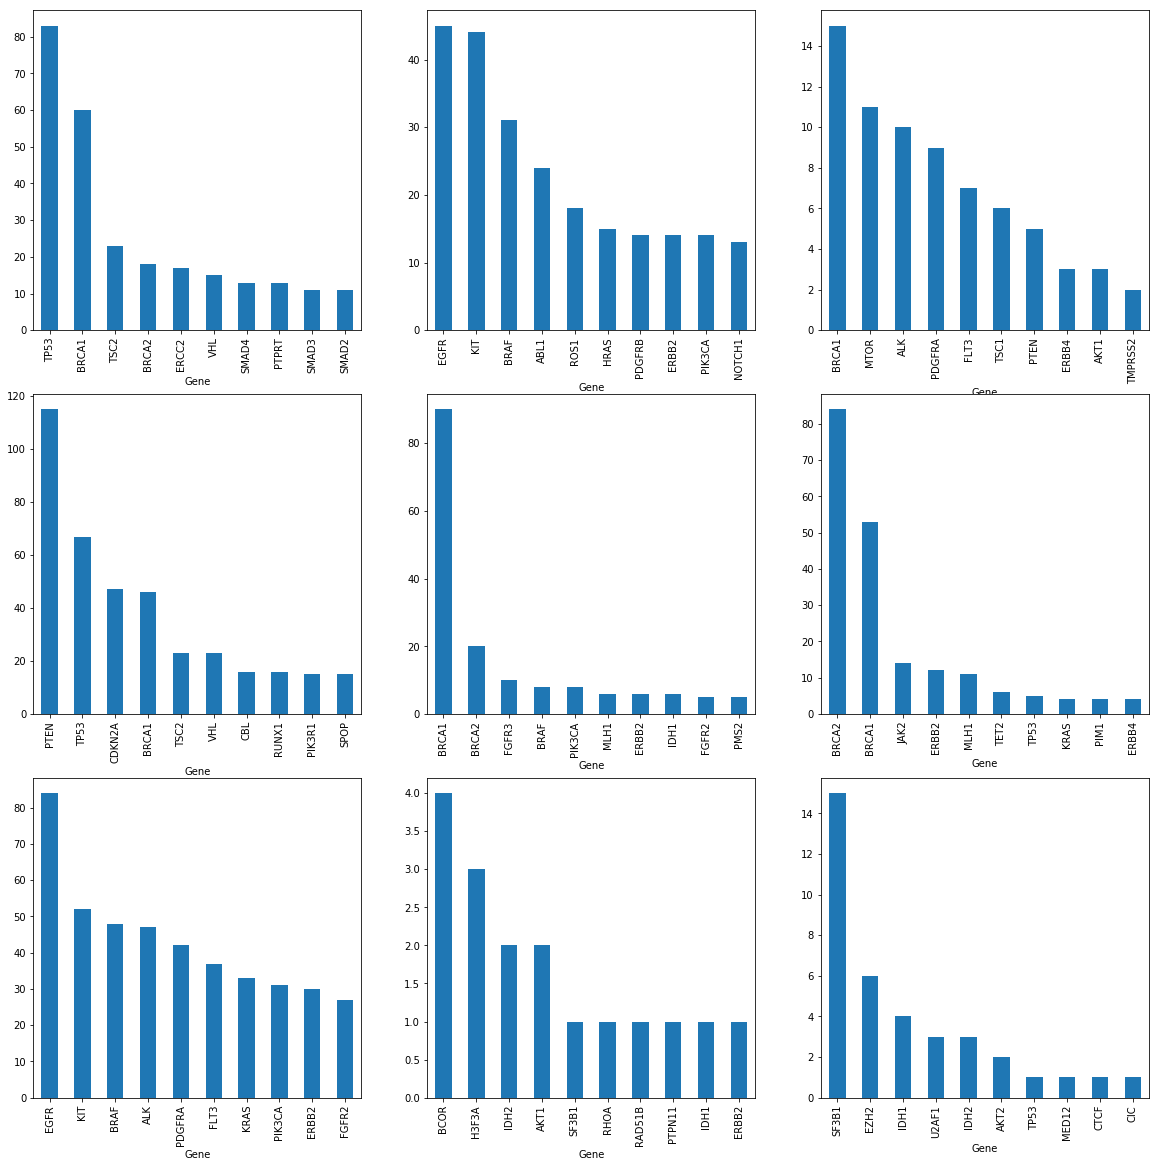

In [29]:
n_classes=df['Class'].nunique()
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        df[df['Class']==((i*3+j)+1)].groupby('Gene')['ID'].count().sort_values(ascending=False).head(10).plot(kind='bar',ax=axs[i][j]);
        

In [10]:
def gene_class(df):
    gene_class_freq=df.groupby(['Gene','Class'])['ID'].count().unstack().fillna(0).apply(lambda x:round((x/np.sum(x)),2),axis=1)
    return gene_class_freq

In [11]:
gene_class_freq=gene_class(df).reset_index()
gene_class_freq

Class,Gene,1,2,3,4,5,6,7,8,9
0,ABL1,0.00,0.92,0.00,0.00,0.00,0.00,0.08,0.00,0.00
1,ACVR1,0.00,0.33,0.00,0.00,0.00,0.00,0.67,0.00,0.00
2,AGO2,0.80,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,AKT1,0.00,0.11,0.11,0.00,0.11,0.00,0.61,0.07,0.00
4,AKT2,0.00,0.09,0.00,0.00,0.00,0.00,0.73,0.00,0.18
5,AKT3,0.00,0.25,0.00,0.00,0.00,0.00,0.75,0.00,0.00
6,ALK,0.00,0.10,0.14,0.00,0.07,0.00,0.68,0.00,0.00
7,APC,0.60,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00
8,AR,0.10,0.05,0.00,0.00,0.15,0.20,0.50,0.00,0.00
9,ARAF,0.00,0.14,0.00,0.00,0.00,0.00,0.86,0.00,0.00


In [12]:
top_variations=Counter(df['Variation']).most_common(10)
top_variations

[('Truncating Mutations', 93),
 ('Deletion', 74),
 ('Amplification', 71),
 ('Fusions', 34),
 ('Overexpression', 6),
 ('G12V', 4),
 ('Q61H', 3),
 ('Q61R', 3),
 ('E17K', 3),
 ('Q61L', 3)]

In [13]:
df.to_csv('data.csv', index = False)